##Métodos simplécticos

Los métodos simplécticos son una clase de métodos de integración numérica especialmente adaptados para resolver sistemas hamiltonianos.

La evolución temporal de un sistema hamiltoniano es equivalente a una transformación canónica que nos lleva de las condiciones iniciales a las finales. Estas transformaciones preservan las constantes de movimiento y el volumen del espacio de las fases ([teorema de Liouville](https://en.wikipedia.org/wiki/Liouville%27s_theorem_(Hamiltonian))).

![Liouville](https://upload.wikimedia.org/wikipedia/commons/f/f7/Hamiltonian_flow_classical.gif)

Los métodos de Leapfrog y Verlet preservan el impulso angular y lineal, así como el volumen del espacio de las fases. Además, estos métodos preservan la simetría de inversión temporal que tienen las ecuaciones de movimiento para un sistema hamiltoniano. Aunque la energía no se conserva exactamente, está acotada y típicamente tiene oscilaciones en el tiempo.

#### Integración de Verlet
Un método simpléctico muy utilizado es el de Verlet. El algoritmo básico de Verlet surge de hacer un desarrolo en serie de la posición $x(t)$:
$$
x(t + h) = x(t) + h \dot{x}(t) + (h^2 /2)\ddot{x}(t) + \mathcal{O}(h^3).
$$
Haciendo el desarrollo para $x(t - h)$ (cambia el signo de las potencias impares de $h$), sumando y reordenando tenemos:
$$
x(t + h) = 2 x(t)- x(t-h) + h^2 \ddot{x}(t) + \mathcal{O}(h^4)
$$
La velocidad no aparece en el método, pero podemos obtenerla haciendo diferencias finitas:
$$
\dot{x}(t)=\frac{x(t+h)-x(t-h)}{2h}+\mathcal{O}(h^2)
$$
en caso de necesitarla.  

Una característica de este método es que necesitamos las posiciones en *los *dos** tiempos previos $t-h$ y $t$ para obtener la posición a tiempo $t+h$. Las condiciones iniciales de un problema nos dan información a un tiempo dado solamente, pero podemos solucionar esto haciendo un primer paso de integración con otro método. La derivada segunda respecto al tiempo es conocida a través de la segunda ley de Newton.

####Integración de Leapfrog
Escribimos el desarrollo en serie de $x(t)$ de la forma
$$
x(t + h) = x(t) + h [\dot{x}(t) + (h /2)\ddot{x}(t)] + \mathcal{O}(h^3),
$$
pero haciendo medio paso de tiempo tenemos
$$
\dot{x}(t+h/2) =\dot{x}(t)+\frac{h}{2} \ddot{x}(t)+ \mathcal{O}(h^2)
$$
Así que podemos escribir la primera ecuación como:
$$
x(t + h) = x(t) + h \dot{x}(t+h/2) + \mathcal{O}(h^3)
$$
y usar
$$
\dot{x}(t+h/2) = \dot{x}(t-h/2) + h\ddot{x}(t) +\mathcal{O}(h^2)
$$
Estas expresiones nos dan la posición y la velocidad a tiempos distintos. De ahí viene el nombre Leapfrog porque velocidades y tiempo *saltan* una por encima de la otra. Si necesitamos la velocidad al mismo tiempo que la posición, siempre podemos hacer "medio" paso de Euler:
$$
\dot{x}(t) = \dot{x}(t\mp h/2)\pm (h/2)\ddot{x}(t).
$$
y se usa lo mismo para arrancar el método dadas las condiciones iniciales.

#### Verlet de velocidades

El método de Verlet de velocidades es una variante más estable del método de Verlet:
$$
x(t+h)= x(t)+ h v(t) +(h^2/2) \ddot{x}(t)
$$
$$
v(t+h)= v(t)+ \tfrac{h}{2} [\ddot{x}(t) + \ddot{x}(t+h)]
$$

O en forma vectorial:
\begin{align}
\mathbf{r}(t + h) &= \mathbf{r}(t) + \mathbf{v}(t)\, h + \tfrac{1}{2} \,\mathbf{a}(t) h^2, \\[6pt]
\mathbf{v}(t + h) &= \mathbf{v}(t) + \frac{\mathbf{a}(t) + \mathbf{a}(t + h)}{2} h.
\end{align}

donde $\mathbf{a}(t)$ es la aceleración en el tiempo $t$, que se puede calcular a partir de las fuerzas en el sistema.

No hace falta almacenar las fuerzas a dos tiempos distintos porque el algoritmo es equivalente a
\begin{align}
\mathbf{v}(t+h/2) &= \mathbf{v}(t) + \tfrac{h}{2} \mathbf{a}(t),\\
\mathbf{r}(t + h) &= \mathbf{r}(t) + h \mathbf{v}(t+h/2),  \\
\mathbf{v}(t + h) &= \mathbf{v}(t+h/2) + \tfrac{h}{2} \mathbf{a}(t+h),
\end{align}
donde la aceleración $\mathbf{a}(t+h)$ se calcula entre el segundo y tercer paso.

El error *global* de este método es $\mathcal{O}(h^2)$.



### Conservación del volumen del espacio de las fases



Por simplicidad consideramos un sistema con solo una coordenada $x$ y un impulso $p$ (por ejemplo un oscilador armónico).

 Comenzamos con un conjunto de condiciones iniciales para $x$ y $p$ en el rectángulo delimitado por los puntos $(x,p)$, $(x+dx,p)$, $(x,p+dp)$ y $(x+dx, p+dp)$ con un diferencial de área en el espacio de las fases $dA=dp\, dx$. La evolución temporal del sistema hace que cada punto del rectángulo se modifique luego de un tiempo $\Delta t$ de acuerdo a las ecuaciones de movimiento
 \begin{align}
x'= x(t+\Delta t)&=f_X(x(t),p(t))=f_X(x,p),\\
p'= p(t+\Delta t)&=f_P(x(t),p(t))=f_P(x,p),
 \end{align}
 donde $f_X$ y $f_P$ son funciones, en general no lineales, de $x$ y $p$.

Nos interesa analizar cómo se modifica el diferencial de área luego de un tiempo $dt$. Para ver eso, podemos pensar a la evolución como un cambio de variables de integración dado por $f_X$ y $f_P$, por lo que
$$
dA'= \det J\, dA,
$$
donde
$$
J=\begin{pmatrix} \frac{\partial f_X}{\partial x}&\frac{\partial f_X}{\partial p}\\
\frac{\partial f_P}{\partial x}&\frac{\partial f_P}{\partial p}
\end{pmatrix},
$$
es el jacobiano de la transformación. Para que se preserve el área, se tiene que cumplir que $\det J=1$.
![Jacobiano](https://upload.wikimedia.org/wikipedia/commons/9/96/Jacobian_determinant_and_distortion.svg)

Otra opción analizar la evolución en el punto $(x+dx,p+dp)$

\begin{align}
 x'+dx'&=f_X(x+dx,p+dp)\sim f_X(x,p)+\frac{\partial f_X}{\partial x} dx+\frac{\partial f_X}{\partial p} dp,\\
 p'+dp'&=f_P(x+dx,p+dp) \sim f_P(x,p)+\frac{\partial f_P}{\partial x} dx+\frac{\partial f_X}{\partial p} dp,
 \end{align}
 Restando las ecuaciones para $(x,p)$ tenemos que
 \begin{align}
 dx'&=\frac{\partial f_X}{\partial x} dx+\frac{\partial f_X}{\partial p} dp,\\
 dp'&= \frac{\partial f_P}{\partial x} dx+\frac{\partial f_X}{\partial p} dp,
 \end{align}
 que se puede escribir en forma matricial
$$
\begin{pmatrix}
dx'\\dp'
\end{pmatrix}=
\begin{pmatrix} \frac{\partial f_X}{\partial x}&\frac{\partial f_X}{\partial p}\\
\frac{\partial f_P}{\partial x}&\frac{\partial f_P}{\partial p}
\end{pmatrix}\begin{pmatrix}
dx\\dp
\end{pmatrix}
$$
y nos indica como se transforman los diferenciales ante la evoución del sistema.


#### Método de Euler

Para un paso de tiempo $h$ usando el método de Euler tenemos

\begin{align}
x_1&= x_0 + h v_0\\
v_1&= v_0 + h a(x_0)
\end{align}
donde $x_0$ y $v_0$ son las condiciones iniciales y $a(x)$ es la aceleración.

Para calcular el jacobiano hacemos un paso de Euler partiendo del punto muy cercano $(x_0+\delta x_0, v_0+\delta v_0)$ tenemos
\begin{align}
x_1+\delta x_1&= x_0 + \delta x_0 + h (v_0+\delta v_0)\\
v_1+\delta v_1&= v_0+\delta v_0 + h a(x_0+\delta x_0).
\end{align}

Haciendo la diferencia entre los dos conjuntos de ecuaciones llegamos a
\begin{align}
\delta x_1&= \delta x_0 + h \delta v_0\\
\delta v_1&= \delta v_0 + h a(x_0+\delta x_0)-a(x_0)\\&\sim \delta v_0 + \delta x_0\, h \,a'(x_0).
\end{align}
Los diferenciales se transforman de acuerdo a
$$
\begin{pmatrix}
\delta x_1\\ \delta v_1
\end{pmatrix}=
\begin{pmatrix}
1& h\\
h a'(x_0)& 1
\end{pmatrix}
\begin{pmatrix}
\delta x_0\\ \delta v_0
\end{pmatrix}
$$
por lo que jacobiano para el método de Euler es:
$$
J=\begin{pmatrix}
1& h\\
h a'(x_0)& 1
\end{pmatrix}
$$
que tiene $\det J\neq 1$ y no preserva el area.

####Verlet de velocidades

Veamos qué ocurre con el método de velocidades de Verlet:

\begin{align}
{v}(t+h/2) &= {v}(t) + \tfrac{h}{2} {a}(t),\\
{x}(t + h) &= {x}(t) + h {v}(t+h/2),  \\
v(t + h) &= v(t+h/2) + \tfrac{h}{2} a(t+h).
\end{align}

Tomando $t=0$ y pasando a tiempo discreto queda de la forma
\begin{align}
{v}_{1/2} &= v_0 + \tfrac{h}{2} a(x_0),\\
x_1 &= x_0 + h v_{1/2},  \\
v_1 &= v_{h/2} + \tfrac{h}{2} a(x_1),
\end{align}
donde $a(x_0)$ es la aceleración calculada para $x=x_0$.

Si aplicamos el primer paso de Verlet al punto $(x_0+\delta x_0, v_0+\delta v_0)$ tenemos
$$
{v}_{1/2}+\delta{v}_{1/2} = v_0 +\delta v_0 + \tfrac{h}{2} a(x_0+\delta x_0)
$$
y para $\delta x_0$  *chico* tenemos a primer orden
$$a(x_0+\delta x_0)\sim a(x_0)+\delta x_0\,a'(x_0)$$
donde $a'(x)$ es la derivada de la aceleración respecto a la posición. Reemplazando queda
$$
{v}_{1/2}+\delta{v}_{1/2} = v_0 +\delta v_0 + \tfrac{h}{2} a(x_0) +\tfrac{h}{2}\delta x_0 a'(x_0)
$$
y restando a esta ecuación la que se obtiene para el punto $(x_0,v_0)$:
$$
{v}_{1/2} = v_0 + \tfrac{h}{2} a(x_0)
$$
obtenemos finalmente
$$
\delta{v}_{1/2} = \delta v_0 + \tfrac{h}{2} a'(x_0)\delta x_0.
$$

Podemos escribir esta última ecuación (junto con la ecuación trivial $\delta x_0=\delta x_0$) en forma matricial
$$
\begin{pmatrix}
\delta x_0\\
\delta v_{1/2}
\end{pmatrix}= M_1
\begin{pmatrix}
\delta x_0\\
\delta v_{0}
\end{pmatrix},
$$

donde
$$
M_1=\begin{pmatrix}1&0\\ \tfrac{h}{2}a'(x_0)&1
\end{pmatrix}.
$$

Haciendo lo mismo con los pasos dos y tres del Verlet de velocidades llegamos a
$$
\begin{pmatrix}
\delta x_1\\
\delta v_{1/2}
\end{pmatrix}= M_2
\begin{pmatrix}
\delta x_0\\
\delta v_{1/2}
\end{pmatrix}
$$
$$
\begin{pmatrix}
\delta x_1\\
\delta v_{1}
\end{pmatrix}= M_3
\begin{pmatrix}
\delta x_1\\
\delta v_{1/2}
\end{pmatrix}
$$

donde
$$
M_2=\begin{pmatrix}1&h\\ 0&1
\end{pmatrix}
$$
y
$$
M_3=\begin{pmatrix}1&0\\ \tfrac{h}{2}a'(x_1)&1
\end{pmatrix}
$$

Esto nos permite escribir:
$$
\begin{pmatrix}
\delta x_1\\
\delta v_1
\end{pmatrix}= J
\begin{pmatrix}
\delta x_0\\
\delta v_0
\end{pmatrix}
$$
donde
$J= M_3M_2M_1$.

Se ve inmediatamente que los determinantes de las matrices $M_i$ son iguales a uno ($\det M_1=\det M_2=\det M_3=1$). Dado que el determinante de un producto de matrices es igual al producto de los determinantes, llegamos a $\det J=1$. Esto nos muestra que cada paso del método de Verlet de velocidades preserva el área en el espacio de las fases. Este resultado se puede generalizar a más variables y vale también para el método Leapfrog.

### Oscilador armónico


Para un oscilador armónico con $m=1$ y $k=1$ el hamiltoniano está dado por
$$
H = \frac{v^2}{2}+\frac{x^2}{2},
$$
por lo que $a(x)=-x$. Suponemos que tenemos condiciones iniciales $x_0$ y $v_0$.



#### Método de Euler
Haciendo un paso del método de Euler:
$$
\begin{align}
x_1 &= x_0 + h v_0\\
v_1 &= v_0+ ha(x_0)=v_0 - h x_0
\end{align}
$$
por lo que tenemos:
$$
\begin{pmatrix}x_1\\v_1\end{pmatrix}=
\begin{pmatrix}1&h\\-h&1\end{pmatrix}
\begin{pmatrix}x_0\\v_0\end{pmatrix}.
$$
La matriz
$$
A=\begin{pmatrix}
1 &h\\
-h& 1
\end{pmatrix},
$$
tiene autovalores $\lambda_\pm = 1\pm ih=r e^{\pm i\theta}$, con módulo
$$r=\sqrt{1+h^2} > 1,$$
y fase
$$\theta =\arctan(h).$$





Los autovectores son $\hat{a}_\pm=\tfrac{1}{\sqrt{2}}(1,\pm i)$.

La representación matricial nos permite escribir para la evolución luego de $n$ pasos de tiempo:
$$
\begin{pmatrix}x_n\\v_n\end{pmatrix}=
\begin{pmatrix}1&h\\-h&1\end{pmatrix}^n
\begin{pmatrix}x_0\\v_0\end{pmatrix}
$$
o
$$
\begin{pmatrix}x_n\\v_n\end{pmatrix}=\left(U
\begin{pmatrix}\lambda_+&0\\0&\lambda_-\end{pmatrix} U^{-1}\right)^n
\begin{pmatrix}x_0\\v_0\end{pmatrix}
$$
donde $U$ es la matriz de cambio de base que se construye poniendo los autovectores en las columnas:
$$
U=\begin{pmatrix}\tfrac{1}{\sqrt{2}}&\tfrac{1}{\sqrt{2}}\\
\tfrac{i}{\sqrt{2}}&\tfrac{-i}{\sqrt{2}}\end{pmatrix}
$$
y
$$
U^{-1}=U^\dagger=\begin{pmatrix}\tfrac{1}{\sqrt{2}}&\tfrac{-i}{\sqrt{2}}\\
\tfrac{1}{\sqrt{2}}&\tfrac{i}{\sqrt{2}}\end{pmatrix}
$$
Usando que $U^{-1}U =I$ queda:
$$
\begin{align}
\begin{pmatrix}x_n\\v_n\end{pmatrix}&=U^{-1}
\begin{pmatrix}\lambda_+^n&0\\0&\lambda_-^n\end{pmatrix} U
\begin{pmatrix}x_0\\v_0\end{pmatrix}\\
&=U^{-1}
\begin{pmatrix}r^n e^{i\theta n}&0\\0&r^n e^{-i\theta n}\end{pmatrix} U
\begin{pmatrix}x_0\\v_0\end{pmatrix}\\
&=\frac{r^n}{2}\begin{pmatrix}1&1\\i&-i\end{pmatrix}\begin{pmatrix}e^{i\theta n}&0\\0&e^{-i\theta n}\end{pmatrix}\begin{pmatrix}1&-i\\1&i\end{pmatrix}\begin{pmatrix}x_0\\v_0\end{pmatrix}\\
&=r^n\begin{pmatrix}\cos(\theta n)&\sin(\theta n)\\-\sin(\theta n)&\cos(\theta n)\end{pmatrix}\begin{pmatrix}x_0\\v_0\end{pmatrix}
\end{align}
$$
Usando que
$$
\arctan(h)\sim h-\frac{h^3}{3}
$$
y $t=hn$
Queda finalmente:
$$
\begin{align}
x_n&= r^n(x_0 \cos(t)+ v_0 \sin(t))\\
v_n&= r^n(-x_0 \sin(t)+ v_0 \cos(t))
\end{align}
$$
La energía al tiempo $t=nh$ es
$$
E_n=\frac{1}{2}(x_n^2+v_n^2)=\frac{r^{2n}}{2}(x_n^2+v_n^2)=r^{2n} E_0
$$
El prefactor $r^{2n}=(1+h^2)^n=(e^{\ln(1+h^2)})^n\sim (e^{h^2})^n= e^{nh^2}= e^{t h}$ por lo que la energía
$$
E_n\sim e^{t h} E_0,
$$
tiene un crecimiento exponencial. Un comportamiento similar (aunque con potencias mayores de $h$) ocurre con otros métodos no simplécticos como los  de Runge-Kutta.

#### Verlet de velocides


Un análisis similar nos permite escribir el método de Verlet para el oscilador armónico de la forma
$$
\begin{pmatrix}
x_1\\
v_1\end{pmatrix} = A \begin{pmatrix}
x_0\\
v_0
\end{pmatrix}.
$$
donde
$$
A=\begin{pmatrix}1-h^2/2&h-h^3/4\\-h&1-h^2/2\end{pmatrix}
$$
que tiene determinate $1$ y dos autovalores de módulo $1$.

Los autovalores son $e^{\pm i\theta}$ con $\theta \sim h+ h^3/24$. Tomando como condición inicial $x_0=1$, $p_0=0$ y realizando el mismo procedimiento que para el método de Euler, llegamos a una expresión para la energía en función del tiempo $t=n\,h$
$$
E_n=\frac{1}{2}\left(1+\frac{h^2}{4}\sin[n\, h(1+\tfrac{h^2}{24})] \right).
$$
que tiene un comportamiento oscilatorio con amplitud $\propto h^2$.


#### Integración numérica del oscilador armónico

Veamos la evolución en el espacio de las fases $(x,v)$ para el oscilador armónico con condiciones iniciales $x_0=1$ y $v_0=0$. El resultado debería ser un círculo de radio $1$. En el caso del método de Euler el radio (y la energía) aumenta exponencialmente con el tiempo.

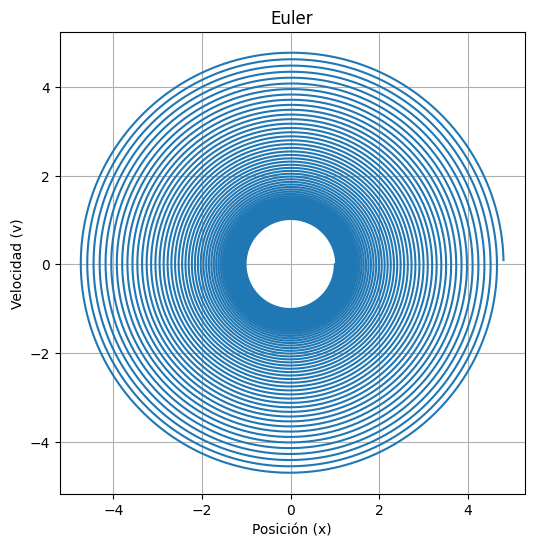

In [ ]:
# @title
#Euler para el oscilador armónico
import numpy as np
import matplotlib.pyplot as plt

# Condiciones iniciales
posicion_inicial = 1.0
velocidad_inicial = 0.0

tiempo_total = 100.0 * np.pi
paso_tiempo = 0.01

posiciones = []
velocidades = []

# Condiciones iniciales
x = posicion_inicial
v = velocidad_inicial

# Integración numérica utilizando el método de Euler
for t in np.arange(0, tiempo_total, paso_tiempo):
    posiciones.append(x)
    velocidades.append(v)
    aceleracion = - x
    x += v * paso_tiempo
    v += aceleracion * paso_tiempo

posiciones = np.array(posiciones)
velocidades = np.array(velocidades)

# Trayectoria en el espacio de las fases
plt.figure(figsize=(6, 6))
plt.plot(posiciones, velocidades)
plt.xlabel('Posición (x)')
plt.ylabel('Velocidad (v)')
plt.title('Euler')
plt.grid()
plt.show()


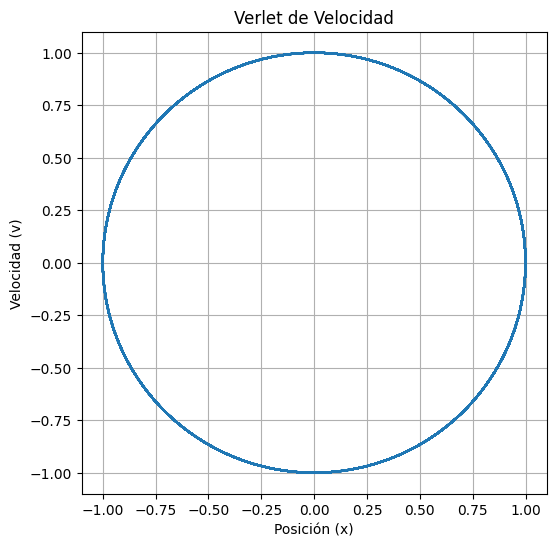

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Constantes
posicion_inicial = 1.0
velocidad_inicial = 0.0
tiempo_total = 100.0 *np.pi
paso_tiempo = 0.01

# Listas para almacenar posiciones y velocidades
posiciones = []
velocidades = []

# Condiciones iniciales
x = posicion_inicial
v = velocidad_inicial

# Verlet de velocidades
for t in np.arange(0, tiempo_total, paso_tiempo):
    posiciones.append(x)
    velocidades.append(v)

    # Aceleración en la posición actual
    aceleracion = - x

    # Actualiza posición utilizando el algoritmo de Verlet
    x += v * paso_tiempo + 0.5 * aceleracion * paso_tiempo**2

    # Aceleración en la posición actualizada
    nueva_aceleracion = - x

    # Actualiza la velocidad utilizando la aceleración promedio
    v += 0.5 * (aceleracion + nueva_aceleracion) * paso_tiempo

posiciones = np.array(posiciones)
velocidades = np.array(velocidades)

plt.figure(figsize=(6, 6))
plt.plot(posiciones, velocidades)
plt.xlabel('Posición (x)')
plt.ylabel('Velocidad (v)')
plt.title('Verlet de Velocidad')
plt.grid()
plt.show()
